## Лабораторна робота 5. **CLASSIFICATION** 🔵/🔺

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

# Опис вибірки "bank-additional-full"

   # Input variables:
   `bank client data:`  
   1 - **age** (numeric)  
   2 - **job** : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")  
   3 - **marital** : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)  
   4 - **education** (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")  
   5 - **default**: has credit in default? (categorical: "no","yes","unknown")  
   6 - **housing**: has housing loan? (categorical: "no","yes","unknown")  
   7 - **loan**: has personal loan? (categorical: "no","yes","unknown")  
   # related with the last contact of the current campaign:  
   8 - **contact**: contact communication type (categorical: "cellular","telephone")   
   9 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")  
  10 - **day_of_week**: last contact day of the week (categorical: "mon","tue","wed","thu","fri")  
  11 - **duration**: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  
   # other attributes:  
  12 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)  
  13 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
  14 - **previous**: number of contacts performed before this campaign and for this client (numeric) 
  15 - **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")  
   # social and economic context attributes  
  16 - **emp.var.rate**: employment variation rate - quarterly indicator (numeric)  
  17 - **cons.price.idx**: consumer price index - monthly indicator (numeric)       
  18 - **cons.conf.idx**: consumer confidence index - monthly indicator (numeric)       
  19 - **euribor3m**: euribor 3 month rate - daily indicator (numeric)  
  20 - **nr.employed**: number of employees - quarterly indicator (numeric)  
    
   `Output variable (desired target):`  
  21 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `bank-additional-full.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. вивести розмірність датасету.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
# import csv

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [54]:
# input_file = 'bank-additional-full.csv'
# output_file = 'bank-additional-full.csv'

# with open(input_file, 'r') as infile:
# 
#     csv_reader = csv.reader(infile, delimiter=';')
#     header = next(csv_reader)
#     rows = [row for row in csv_reader]


# with open(output_file, 'w') as outfile:
# 
#     csv_writer = csv.writer(outfile, delimiter=',')
#     csv_writer.writerow(header)
#     csv_writer.writerows(rows)

In [55]:
dataset = pd.read_csv('bank-additional-full.csv')

In [56]:
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [57]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [58]:
dataset.shape

(41188, 21)

**Завдання 2** підготовка цільової змінної  

1. проаналізувати атрибути вибірки, визначити цільовий атрибут `target atribute`;
2. якщо `target atribute` є категоріальним, його необхідно перетворити в чисельний.

In [59]:
dataset["y"] = dataset["y"].map({'yes': 1, 'no':0}).astype(int)

In [60]:
bank_target = dataset[["y"]]
bank_target

,y
0,0
1,0
2,0
3,0
4,0
...,...
41183,1
41184,0
41185,0
41186,1


## Аналіз змінних, які характеризують клієнтів банку:

**Завдання 3** Визначитись зі всіма атрибутами, що характреризують кліентів банку:
- виділити їх в окрему частину;
- первірити всі змінні (які унікальні значення містять атрибути)(дивись опис датасету).

In [61]:
bank_client = dataset[['age','job','marital','education','default','housing','loan']]

In [62]:
bank_client

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes
...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no
41184,46,blue-collar,married,professional.course,no,no,no
41185,56,retired,married,university.degree,no,yes,no
41186,44,technician,married,professional.course,no,no,no


In [63]:
for column in bank_client:
    
        print(f"Unique values in column {column}:")
        print(bank_client[column].unique())
        print("\n")

Unique values in column age:
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


Unique values in column job:
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


Unique values in column marital:
['married' 'single' 'divorced' 'unknown']


Unique values in column education:
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


Unique values in column default:
['no' 'unknown' 'yes']


Unique values in column housing:
['no' 'yes' 'unknown']


Unique values in column loan:
['no' 'yes' 'unknown']




**Завдання 4** Аналіз атрибуту `Age`:  
1. Вивести максимальне та мінімальне значення;  
2. Перевірити на наявність `NaN`;  
3. Провести візуальний аналіз зміної `Age`:
    - побудувати `countplot`, `boxplot`, `distplot`;
    - перевірити розподіл по змінній `Age` на важкі хвости.

In [64]:
print("Max age:", bank_client['age'].max())
print("Min age:", bank_client['age'].min())
print("NaN values:", np.isnan(bank_client['age']).sum())

Max age: 98
Min age: 17
NaN values: 0


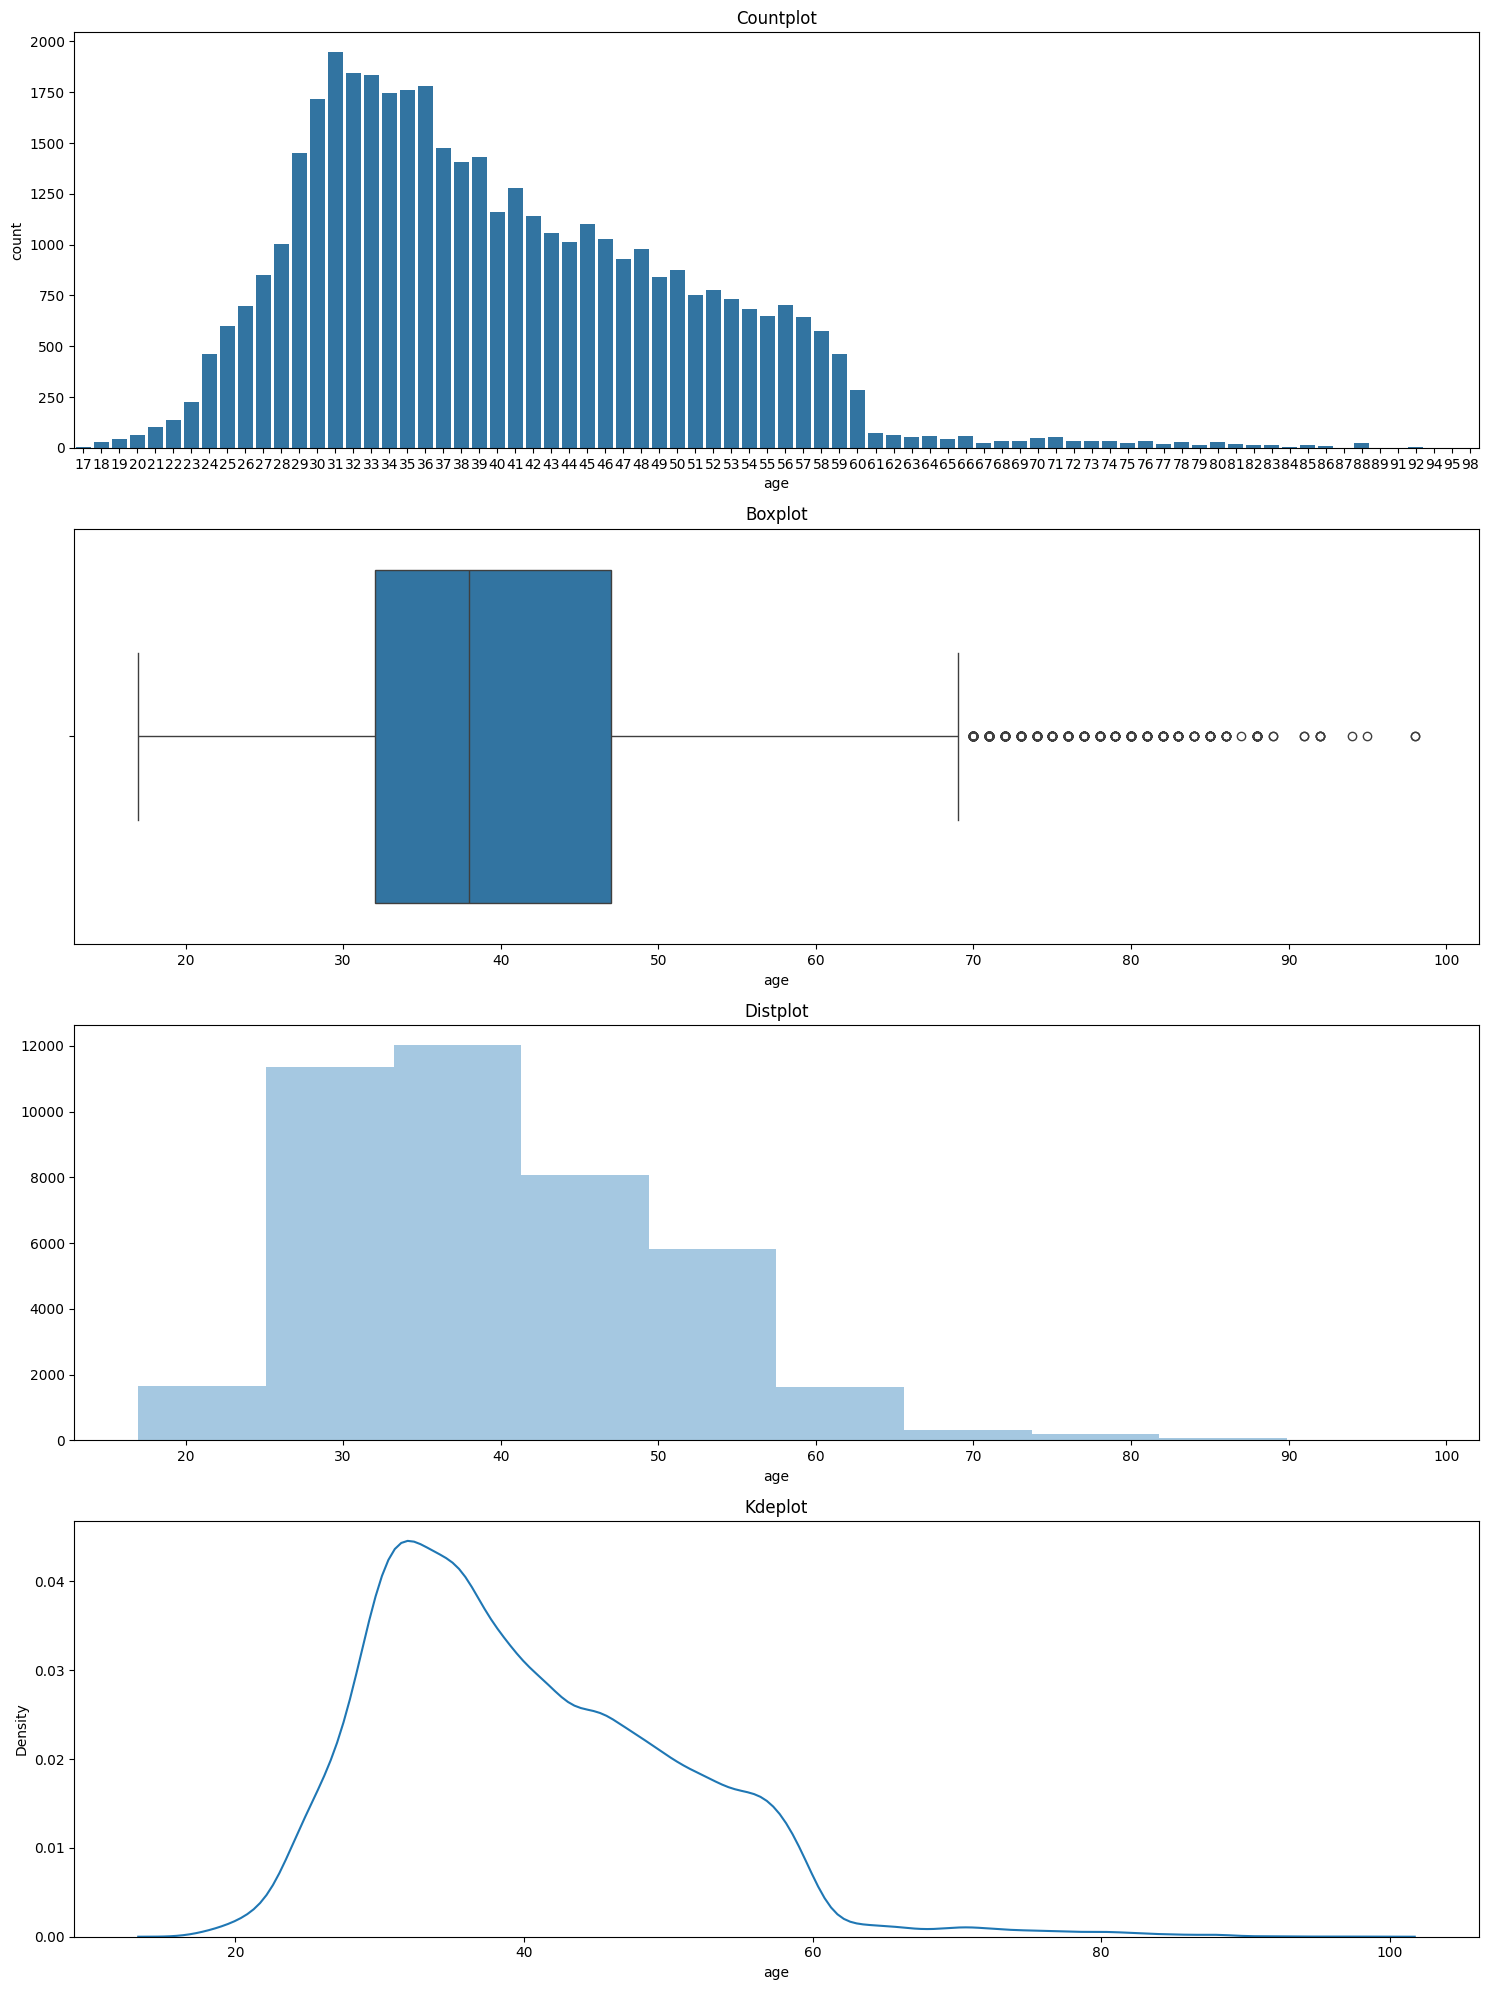

In [65]:
plt.figure(figsize=(15, 20))

plt.subplot(4, 1, 1)
sns.countplot(x='age', data=bank_client)
plt.title('Countplot')

plt.subplot(4, 1, 2)
sns.boxplot(x='age', data=bank_client)
plt.title('Boxplot')

plt.subplot(4, 1, 3)
sns.distplot(bank_client['age'], kde=False, bins=10)
plt.title('Distplot')

plt.subplot(4, 1, 4)
sns.kdeplot(bank_client['age'])
plt.title('Kdeplot')

plt.tight_layout()
plt.show()

**Висновки з 1-4 завдання (детальні)**

1.   Було завантажено вибірку `bank-additional-full.csv`, виведено основну статистичну інформацію по числовим змінним та виведено розмірність даного датасету.
2.   Після аналізу атрибутів вибірки, було визначено цільовий атрибут `target atribute` і замінено значення `yes`: 1, `no`:0.
3.   Проаналізувавши атрибути, що характеризують клієнтів банку, для виділення їх в окрему частину (`age`,`job`,`marital`,`education`,`default`,`housing`,`loan`), було перевірено всі змінні на унікальні значення.
4.   Для аналізу атрибуту `Age` було виведено максимальне (98) та мінімальне значення (17), здійснено перевірку на наявність `NaN` (0) і проведено візульний аналіз. Було побудовано `countplot`, `boxplot`, `distplot` і перевірено розподіл по даній змінній на важкі хвости. Згідно візуалізацій можна спостерігати важкий правий хвіст, що свідчить про кількість осіб віком від 60 років, які не входять в міжквартильний діапазон. Наявне позитивне перекошення в діапазоні 20-40 років.


**Завдання 5** Перевірити атрибут `Age` на викиди: 

In [66]:
def detect_outliers_with_interquantile_range(df: pd.DataFrame,
                                             column: str,
                                             low_percentile: int,
                                             high_percentile: int) -> pd.DataFrame:
    """
    Detecting outliers using interquantile range set manually

    df: pd.DataFrame to detect outliers
    column: target column
    low_percentile: lower bound between 0 and 100
    high_percentile: upper bound between 0 and 100

    returns: pd.DataFrame with detected outliers

    """

    sorted_data = np.sort(df[column])
    # Calculate Q1, Q2, Q3 and IQR.
    Q1 = np.percentile(sorted_data, low_percentile)
    Q3 = np.percentile(sorted_data, high_percentile)
    print('')
    print(f"Q1 {low_percentile} percentile of the given data: {Q1}")
    print('')
    print(f"Q3 {high_percentile} percentile of the given data: {Q3}")
    print('')
    print('----------------------------------------------------------')

    IQR = Q3 - Q1
    print('')
    print(f"Interquartile range: {IQR}")
    print('')
    print('----------------------------------------------------------')
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    print('')
    print(f" Lower bound: {low_lim}")
    print('')
    print(f" Upper bound: {up_lim}")
    print('')
    print('----------------------------------------------------------')
    outliers = df[(df[column] > up_lim) | (df[column] < low_lim)]
    print('')
    print(f"Outliers in the dataset:")
    display(outliers)


    return outliers

In [67]:
outliers = detect_outliers_with_interquantile_range(bank_client, 'age', 10, 90)


Q1 10 percentile of the given data: 28.0

Q3 90 percentile of the given data: 55.0

----------------------------------------------------------

Interquartile range: 27.0

----------------------------------------------------------

 Lower bound: -12.5

 Upper bound: 95.5

----------------------------------------------------------

Outliers in the dataset:


,age,job,marital,education,default,housing,loan
38452,98,retired,married,basic.4y,unknown,yes,no
38455,98,retired,married,basic.4y,unknown,yes,no


**Висновки з завдання 5 (детальні)**

1.   `low_percentile` та `high_percentile`, де Q1 - це десятий перцентиль і Q3 - дев'яностий. Результати 28 і 55 означають, що 10% осіб є віком менше 28 років і 90% - 55 років відповідно.
2.   `Interquartile range` дорівнює 27 і є мірою розсіювання даних.
3.   `Lower bound` та `Upper bound` дорівнюють -12.5 і 95.5 відповідно. Верхня межа містить викиди у віці понад 95.5 через те, що вона є дуже високою, тоді як нижня межа є від'ємною, що дозволяє не враховувати її.
4.   `Outliers in the dataset` - було виведено два рядки з даними, які вважаються викидами. Вік у них перевищує верхню межу (95.5).

**Завдання 6** Аналіз атрибутів `job`, `marital` та `education`:  
- Побудувати графіки розподілу даних по цим змінним.

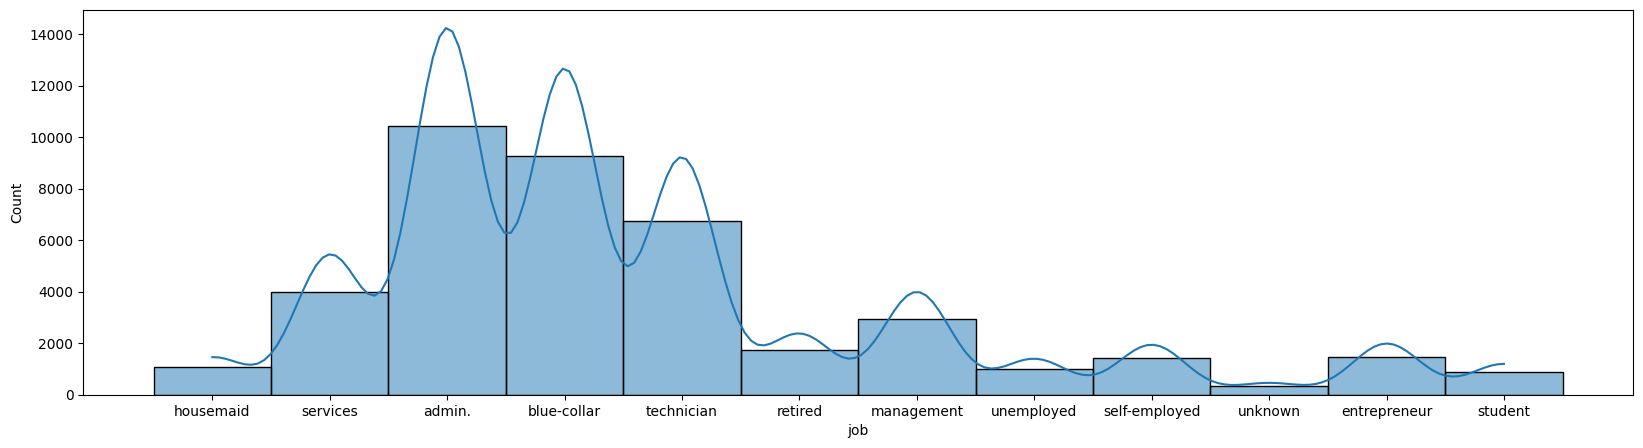

In [68]:
fig = plt.figure(figsize=(20, 5))

sns.histplot(bank_client['job'], kde=True)
plt.show()

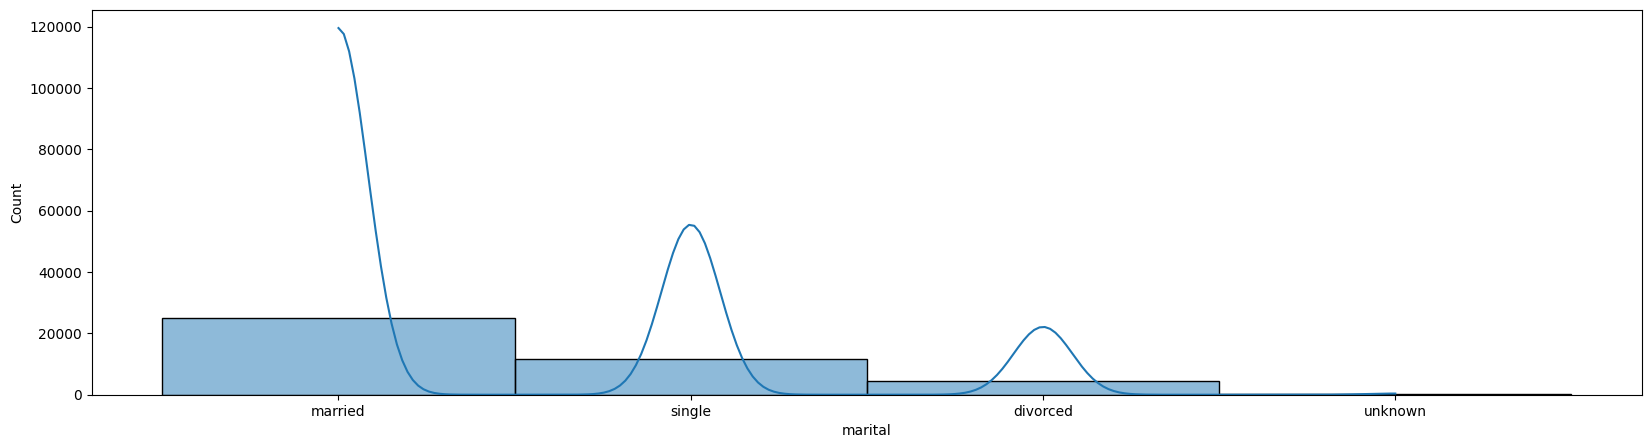

In [69]:
fig = plt.figure(figsize=(20, 5))

sns.histplot(bank_client['marital'], kde=True)
plt.show()

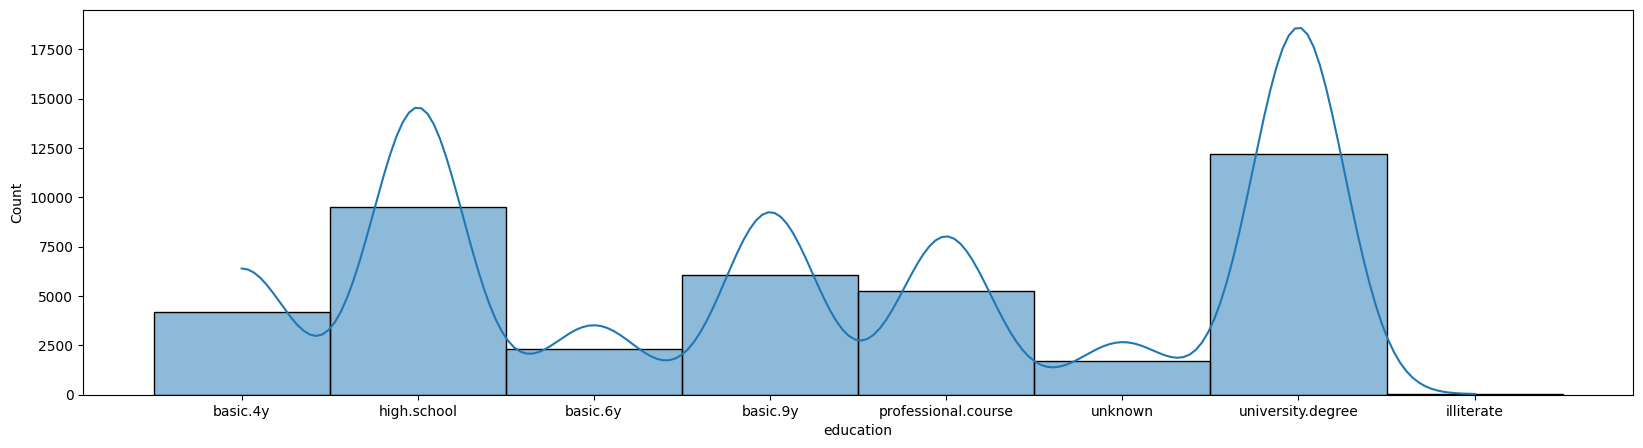

In [70]:
fig = plt.figure(figsize=(20, 5))

sns.histplot(bank_client['education'], kde=True)
plt.show()

**Висновки з завдання 6 (детальні)**

1.   На графіку розподілу даних по змінній `job` можна спостерігати такі закономірності: Найпоширенішими є професії `admin`, `blue-collar` і `technician`, а серед найменш поширених особи насправді не мають професії - `housemaid`, `unemployed`, `unknown` і `student`. За допомогою лінії тренду (kde) можна переконатися в попередніх твердженнях, так як вона демонструє загальний розподіл по змінній `job`.
2.   На графіку розподілу даних по змінній `martial` є чотири категорії: `married`, `single`, `divorced` і `unknown`. Проаналізуваваши графік, можна зробити висновкок, що категорія з найбільшою кількістю осіб - `married`. `single` має вдвічі меншу кількість у порівнянні з попередньою. Далі йде `divorced`, яка має майже втричі меншу кількість і категорія `unknown`, яка містить найменшу кількість.
3.   На графіку розподілу даних по змінній `education` можна спостерігати таку закономірність: Найбільша кількість осіб належить до категорії `university.degree`, після чого йде `high.school`, `basic.9y`, `professional.course`, `basic.4y`, `basic.6y`, `unknown` і `illiterate`.


**Завдання 7** Аналіз атрибутів `default`, `housing` та `loan`:  
- Побудувати графіки розподілу даних по цим змінним.

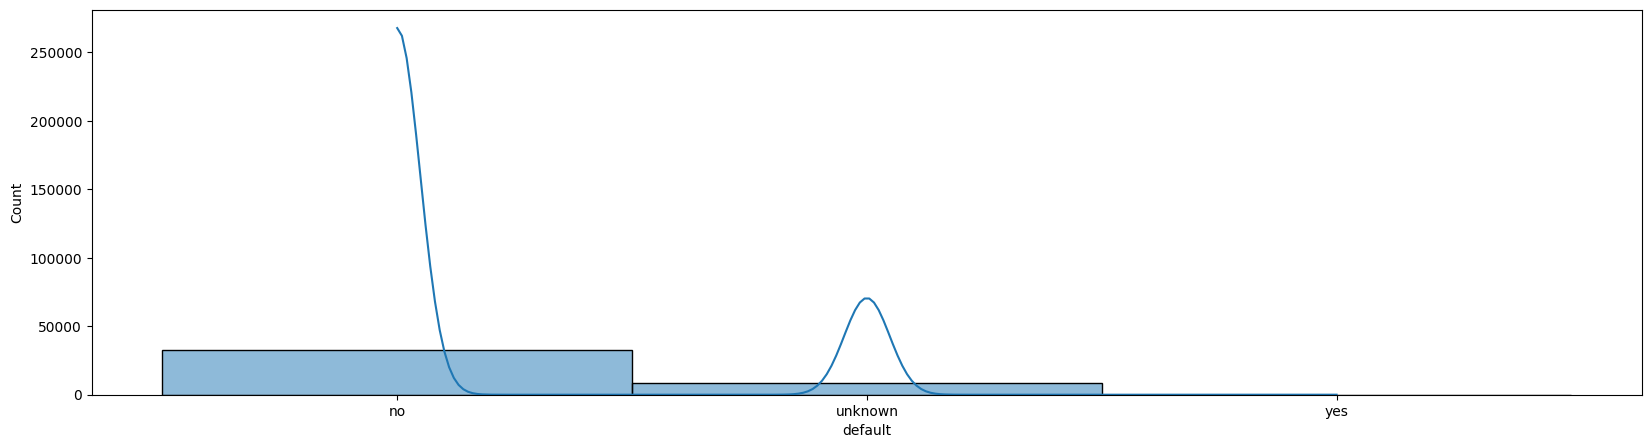

In [71]:
fig = plt.figure(figsize=(20, 5))

sns.histplot(bank_client['default'], kde=True)
plt.show()

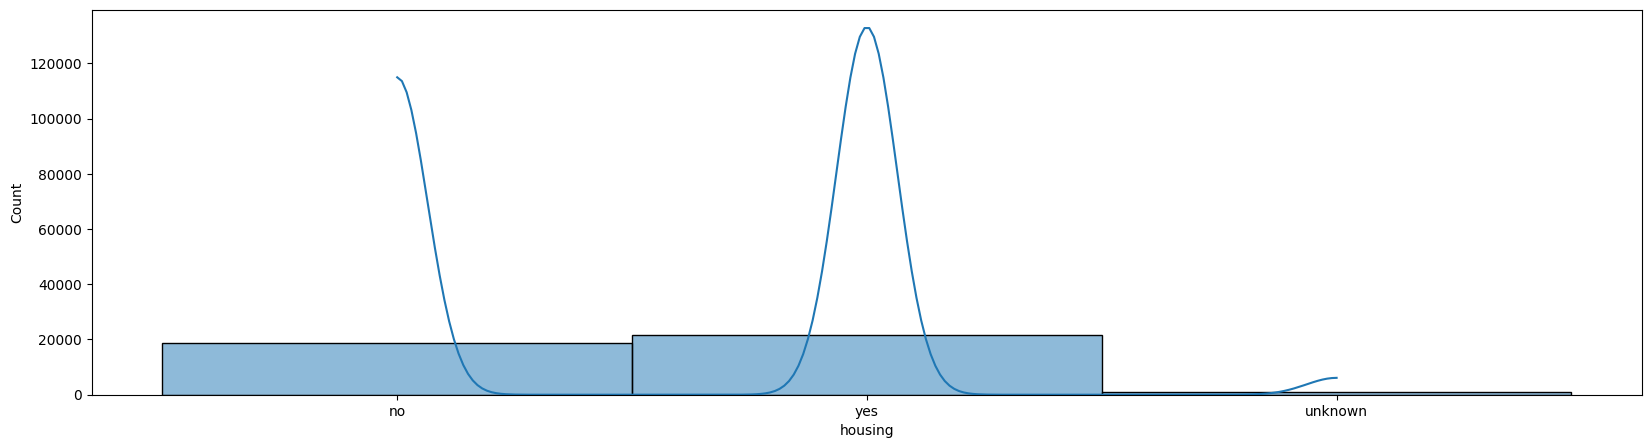

In [72]:
fig = plt.figure(figsize=(20, 5))

sns.histplot(bank_client['housing'], kde=True)
plt.show()

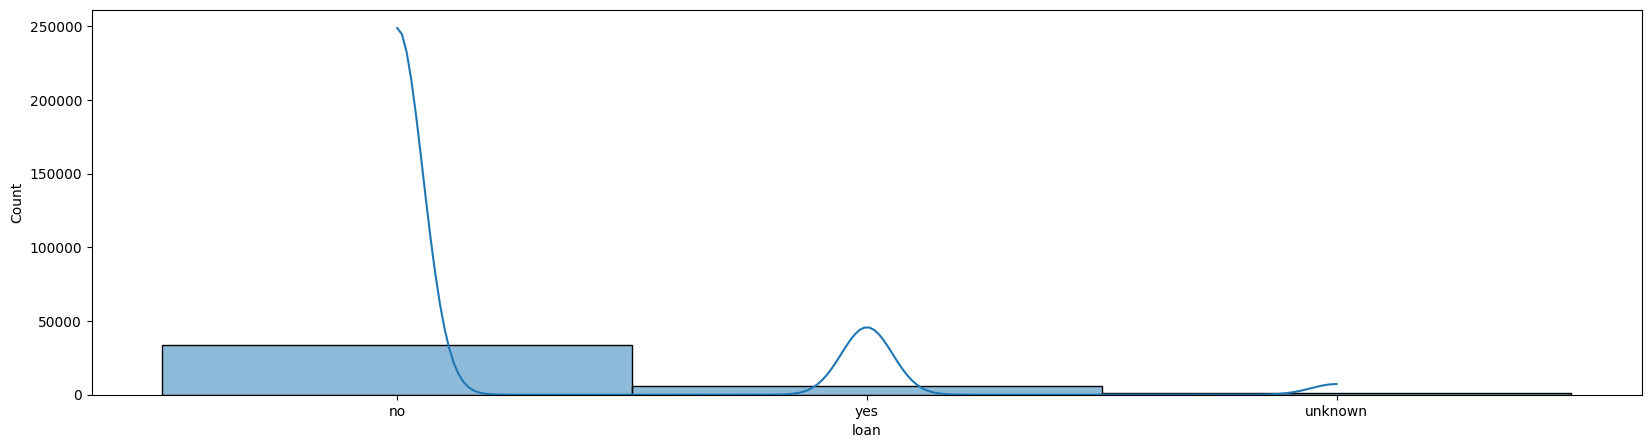

In [73]:
fig = plt.figure(figsize=(20, 5))

sns.histplot(bank_client['loan'], kde=True)
plt.show()

**Завдання 8** Змінні **Jobs, Marital, Education, Default, Housing, Loan** трансформувати в неперервні змінні:

In [74]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
      # Leaves NaN as it is.
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = le.fit_transform(df[col])
        df[col] = df[col].fillna('<MISSING>')
      
    return df

In [75]:
bank_client = encode_categorical_columns(bank_client, ['job', 'marital', 'education', 'default', 'housing',  'loan'])

In [76]:
bank_client

,age,job,marital,education,default,housing,loan
0,56,3,1,0,0,0,0
1,57,7,1,3,1,0,0
2,37,7,1,3,0,2,0
3,40,0,1,1,0,0,0
4,56,7,1,3,0,0,2
...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0
41184,46,1,1,5,0,0,0
41185,56,5,1,6,0,2,0
41186,44,9,1,5,0,0,0


**Завдання 9** Трансфомувати змінну **Age** (використовуючи її квартильні значення):




In [77]:
def encode_age(dataframe: pd.DataFrame, age_col: str ) -> pd.DataFrame:
  """
  Function for encoding age column
    
  df: pd.DataFrame to encode
  age_col: age col to encode 
  """
  dataframe[age_col + '_qcut'] = pd.qcut(dataframe[age_col], 4, labels=False)
          
  return dataframe

In [78]:
bank_client = encode_age(bank_client, 'age')

print(bank_client['age_qcut'].unique())

[3 1 2 0]


**Висновки з завдання 9 (детальні)** перевірити як відбулося перетворення змінних


Трансформувавши змінну `Age` використовучи її квартильні значення і перевіривши як відбулося перетворення змінних, можна зробити такі висновки:

Значення `0` свідчить про приналежність віку особи до першого квартилю і є найнижчими 25% значень у даному датафреймі.

Якщо йти по зростанню, то далі йде `2` (третій квартиль) і знаходиться в межах 50-75% значень.

`1` (другий квартиль) і в межах 25-50%.

`3` (четвертий квартиль) і є найвищими 25% значень.

## Вибірка містить певну кількість атрибутів, які характеризують останій зв'язок кліентів з банком

**Завдання 10** Виділити в окремий датафрейм змінні, які характеризують зв'язок клієнтів з банком;
- вивести цей датафрейм;
- перевірити ці змінні на `NaN`.

In [79]:
bank_relat = dataset[['contact', 'month', 'day_of_week', 'duration']]

bank_relat.isna().sum()

contact        0
month          0
day_of_week    0
duration       0
dtype: int64

**Завдання 11** вивести унікальні значення, які містять атрибути `contact`, `month`, `day_of_week`

In [80]:
for column in bank_relat:
    if column not in ['duration']:
        
        print(f"Unique values in column {column}:")
        print(bank_relat[column].unique())
        print("\n")

Unique values in column contact:
['telephone' 'cellular']


Unique values in column month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


Unique values in column day_of_week:
['mon' 'tue' 'wed' 'thu' 'fri']




# Провести аналіз змінної **Duration**

змінна ` duration` містить інформацію про тривалість останнього дзвінка, в секундах (числова). Важливе зауваження: цей атрибут сильно впливає на цільову змінну (наприклад, якщо тривалість = 0, тоді y = "ні"). Проте тривалість невідома до здійснення дзвінка. Крім того, після закінчення дзвінка y, очевидно, відомо. Таким чином, цей внесок слід включати лише для цілей порівняльних показників і відкидати, якщо метою є реалістична модель прогнозування.

**Завдання 12** Аналіз атрибуту `duration`:  

Провести візуальний аналіз зміної `duration`:  


*   побудувати  `boxplot` та `distplot`; 
*   перевірити розподіл по змінній `duration` на важкі хвости. 



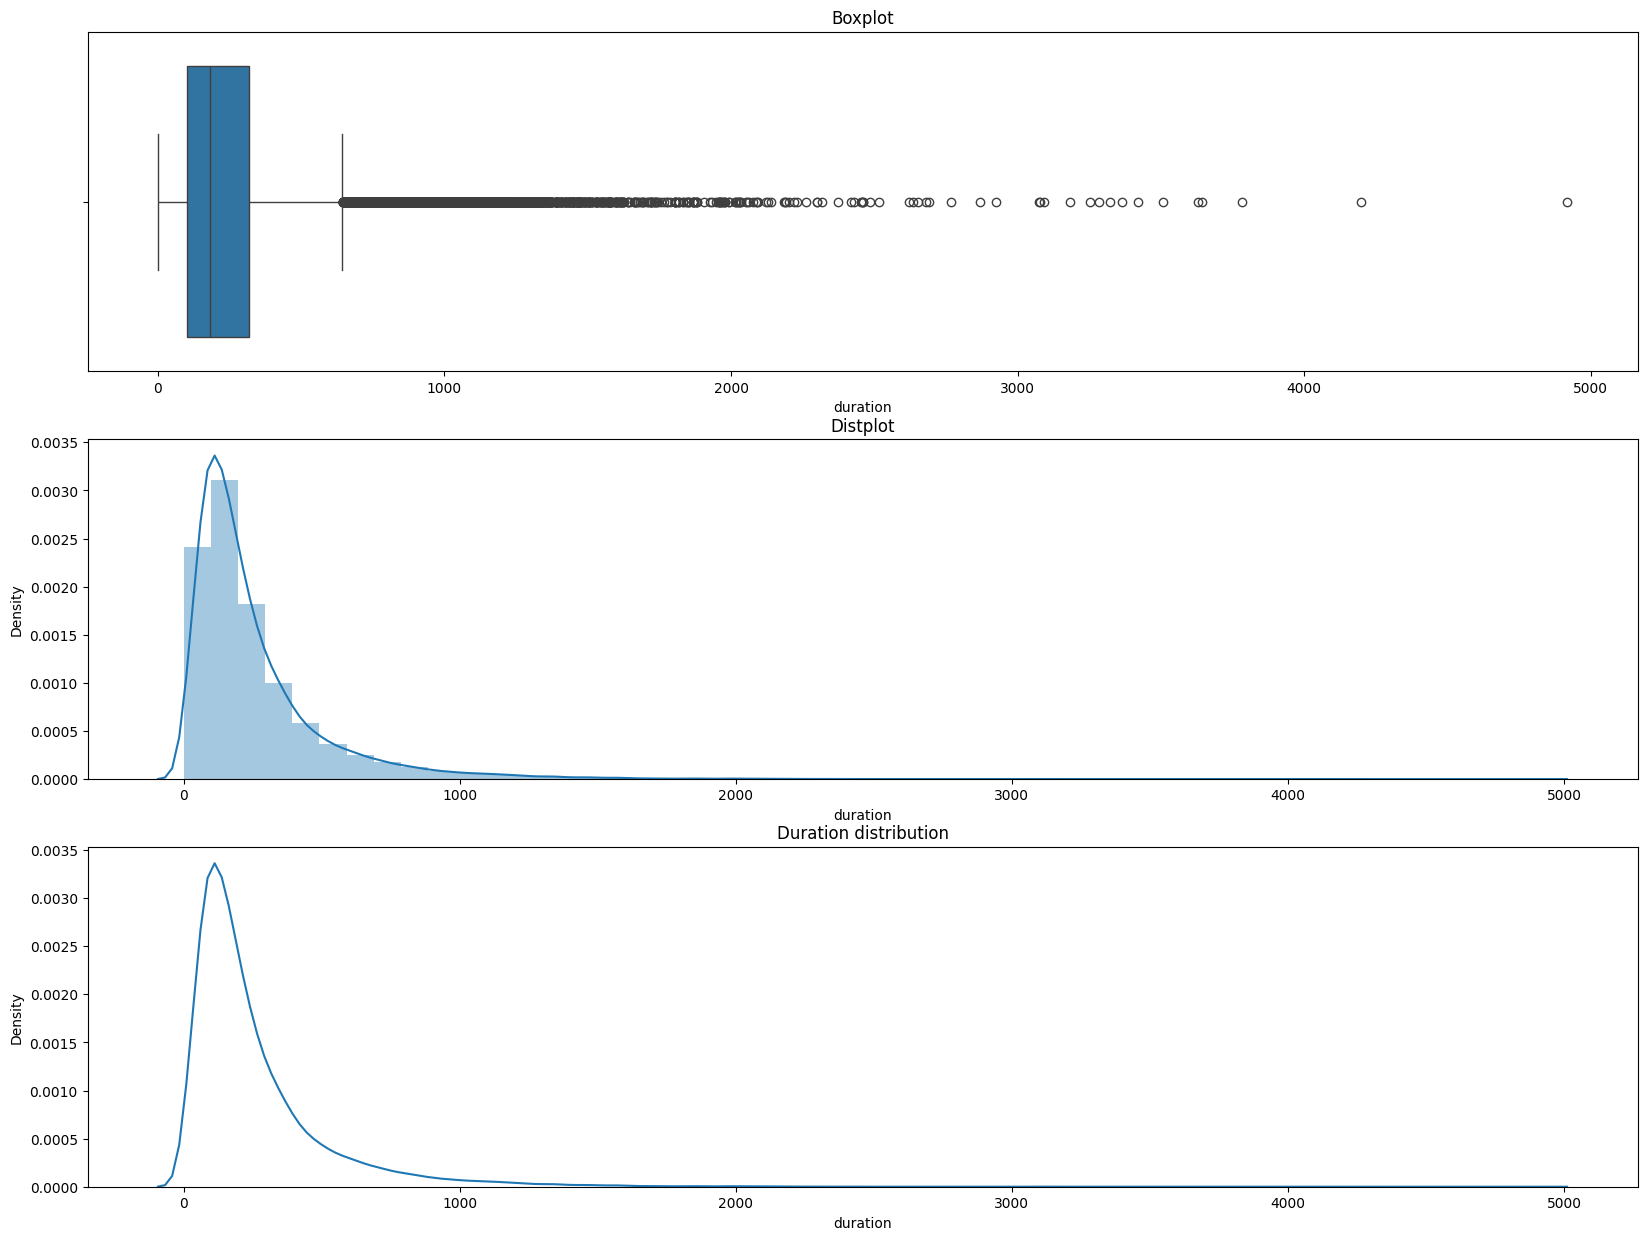

In [81]:
plt.figure(figsize=(20, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x='duration', data=bank_relat)
plt.title('Boxplot')

plt.subplot(3, 1, 2)
sns.distplot(bank_relat['duration'], kde=True)
plt.title('Distplot')

plt.subplot(3, 1, 3)
sns.kdeplot(bank_relat['duration'])
plt.title('Duration distribution')

plt.show()

**Завдання 13** Закодувати змінні Contact, Month, Day of Week (використовуйте функцію `encode_categorical_columns()`)

In [82]:
def encode_categorical_columns(df: pd.DataFrame, categorical_cols: list) -> pd.DataFrame:
    """
    Function for encoding categorical features using LabelEncoder
    
    df: pd.DataFrame to encode
    categorical_cols: specified columns to encode
    
    returns: pd.DataFrame with encoded values
    """
    for col in categorical_cols:
        le = LabelEncoder()
        not_null = df[col][df[col].notnull()]
        df[col] = le.fit_transform(df[col])
        df[col] = df[col].fillna('<MISSING>')
    return df

In [83]:
bank_relat = encode_categorical_columns(bank_relat, ['contact', 'month', 'day_of_week'])

In [84]:
bank_relat

,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307
...,...,...,...,...
41183,0,7,0,334
41184,0,7,0,383
41185,0,7,0,189
41186,0,7,0,442


**Завдання 14** Трансфомувати змінну **duration**, використовуючи її квартильні значення:

In [85]:
def encode_duration(dataframe: pd.DataFrame, duration_col: str ) -> pd.DataFrame:
  """
  Function for encoding duration column
    
  df: pd.DataFrame to encode
  duration_col: duration col to encode 
  """
  
  dataframe[duration_col + '_qcut'] = pd.qcut(dataframe[duration_col], 4, labels=False)
        
  return dataframe

In [86]:
bank_relat = encode_duration(bank_relat, 'duration')

print(bank_relat['duration_qcut'].unique())

[2 1 3 0]


## Провести аналіз атрибутів **соціального та економічного контексту**

**Завдання 15** Виділити в окремий датафрейм атрибути соціального та економічного контексту

In [87]:
bank_socec = dataset[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [88]:
bank_socec

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...
41183,-1.1,94.767,-50.8,1.028,4963.6
41184,-1.1,94.767,-50.8,1.028,4963.6
41185,-1.1,94.767,-50.8,1.028,4963.6
41186,-1.1,94.767,-50.8,1.028,4963.6


**Завдання 16** Виділити в окремий датафрейм всі інші атрибути атрибути - `campaign`, `pdays`,`previous`, `poutcome`

In [89]:
bank_other = dataset[['campaign', 'pdays', 'previous', 'poutcome']]

In [90]:
bank_other

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent
...,...,...,...,...
41183,1,999,0,nonexistent
41184,1,999,0,nonexistent
41185,2,999,0,nonexistent
41186,1,999,0,nonexistent


**Завдання 17** Провести трансформацію атрибуту `poutcome`

In [91]:
bank_other['poutcome'] = bank_other['poutcome'].map({'nonexistent': 0, 'failure': 1, 'success': 2})

print(bank_other['poutcome'].unique())

[0 1 2]


## Будування моделей класифікації

**Завдання 18** З'єднати всі отримані блоки в один датафрейм і перевірити, що він містить тільки потрібні для моделювання колонки

In [92]:
bank_final = pd.concat([bank_client, bank_relat, bank_socec, bank_other], axis=1, join='inner')

bank_final = bank_final[['poutcome', 'age_qcut', 'job', 'marital', 'education', 'default', 'housing', 'loan',
                         'contact', 'month', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
                         'nr.employed', 'day_of_week', 'duration_qcut', 'campaign', 'pdays', 'previous']]

**Завдання 19** Провести ділення вибірки

In [93]:
def prepare_data_for_training(X: pd.DataFrame,
                              target: pd.Series,
                              test_size: float,
                              n_splits: int,
                              random_state: int):
    """
    Function that prepares data for training. Splits the data into train and test datasets and get k-folds for cross-validation

    X: pd.DataFrame with features
    target: target pd.Series
    test_size: the size of test datasets
    n_splits: number of cross-validation splits
    random_state: random state to reproduce the same split

    returns: X_train, X_test, y_train, y_test, k_fold
    """

    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = test_size, random_state = random_state)
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    return X_train, X_test, y_train, y_test, k_fold

In [94]:
X_train, X_test, y_train, y_test, k_fold = prepare_data_for_training(bank_final, bank_target['y'], 0.2, 10, 101)

In [95]:
def scale_the_data(X_train: pd.DataFrame, 
                   X_test: pd.DataFrame):
  
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test

In [96]:
X_train, X_test = scale_the_data(X_train, X_test)

## Логістична Регресія

In [97]:
logmodel = LogisticRegression() 
logmodel.fit(X_train, y_train)
logpred = logmodel.predict(X_test)

print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7112  167]
 [ 633  326]]
90.0


## k-NN

k=1 86.82 (+/- 0.43)
k=2 89.32 (+/- 0.51)
k=3 88.99 (+/- 0.43)
k=4 89.82 (+/- 0.50)
k=5 89.76 (+/- 0.70)
k=6 90.24 (+/- 0.54)
k=7 90.14 (+/- 0.62)
k=8 90.37 (+/- 0.50)
k=9 90.32 (+/- 0.68)
k=10 90.39 (+/- 0.55)
k=11 90.40 (+/- 0.64)
k=12 90.39 (+/- 0.55)
k=13 90.45 (+/- 0.62)
k=14 90.42 (+/- 0.61)
k=15 90.47 (+/- 0.65)
k=16 90.51 (+/- 0.65)
k=17 90.55 (+/- 0.63)
k=18 90.55 (+/- 0.64)
k=19 90.56 (+/- 0.68)
k=20 90.51 (+/- 0.66)
k=21 90.56 (+/- 0.69)
k=22 90.53 (+/- 0.63)
k=23 90.55 (+/- 0.67)
k=24 90.53 (+/- 0.64)
k=25 90.58 (+/- 0.64)
The optimal number of neighbors is 24 with 90.6%


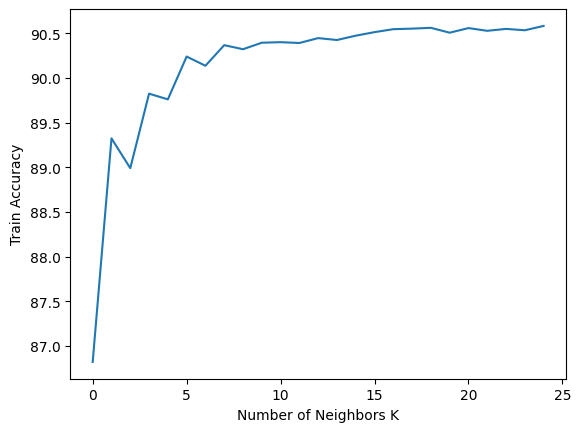

In [98]:
#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [99]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_test, y_test, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[7159  120]
 [ 703  256]]
90.0


## Логістична Регресія

In [100]:
models = pd.DataFrame({
                'Models': ['LogisticRegression'],
                'Score':  [LOGCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
0,LogisticRegression,0.903499


**Висновки по моделям (детальні)**

1.   `Логістична регресія`: результат точності дорівнює 90%. Дана модель не може давати відповідь із дуже високим показником, особливо тоді, коли класи не є збалансованими.

2.   `k-NN`: використання даної моделі з оптимальним числом сусідів видало результат точності 90%. Число сусідів визначається за допомогою `cross validation`. Можна зробити ідентичний висновок до попередньої моделі стосовно точності.

3.   ...
